I would like to introduce new dimension called Inter-Purchase Time(T) to the traditional RFM (Recency, Frequency and Monatery) Model. New attribute "T" will include the customer dynamic purchasing behaviour within their shopping cycle.
But why RFMT? 
RFM Model was proposed by Hughes in 1994 to analyze customer behaviors. Implementing RFM Model permanently is challenging due to the unpredictable nature of human behavior and the potential for inaccurate results. Therefore, it is vital to include criteria which explain the buying habit of individuals.

Customer segmentation is a process of dividing all customers into distinct groups that share similar characteristics, such as demographics, interests, patterns, or location, and can help a business focus marketing efforts and resources on valuable, loyal customers to achieve business goals.Customer segmentation can be performed with customers’ demographic, geographic, behavioral, and psychological data.Digital business has increased rapidly during covid-19 and it is extremely important to maintain long-term relationship with customer.In US, 85% of new product launch was reported failed because for poor market segmentaton.therefore, more study and improvments is required on the consumer behavioural and engagement.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading and reading the dataset

In [2]:
#lETS READ THE DATASET...
data = pd.read_csv('db_online.csv')
print("-"*50)
print(" Data imported successfully!!")
data.head(5)

--------------------------------------------------
 Data imported successfully!!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.0,United Kingdom


# Exploring info

In [3]:
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())
    
    
data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:1048575
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

    InvoiceDate  Price  Customer ID         Country  
0  12/1/09 7:45   6.95      13085.0  United Kingdom  
1  12/1/09 7:45   6.75      13085.0  United Kingdom  
2  12/1/09 7:45   6.75      13085.0  United Kingdom  
3  12/1/09 7:45   2.10      13085.0  United Kingdom  
4  12/1/09 7:45   1.25      13085.

Point to be noted

The Dataset has Rows: 1067371 and Columns:8</li>
The Dataset has 3 types of columns: strings(5), integer(1), float(2)</li>
The Dataset has Missing values in Customer ID (243007) and Description (4382)</li>
Invoice starts with the 'c' needs to be cleaned as it is cancelled transaction</li>
The Dataset has duplicates</li>
Aslo check for negative value and outliers in Quantity and Price</li>



# Data wrangling

<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">1️⃣<strong>Dealing with Missing values<strong>

In [4]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",data.shape)
data.dropna(subset="Customer ID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",data.shape)

Shape of data before removing NaN's CustomerID (1048575, 8)
Shape of data after removing NaN's CustomerID (811893, 8)


In [5]:
print("Missing values in each column after cleaning customerID :\n",data.isnull().sum())

Missing values in each column after cleaning customerID :
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


 <ul style="list-style-type: disc; font-family: Georgia; color: #006400; font-size: 110%;">
    <li>Data looks fine now. (luckily NaNs from Description was also alligned with missing customer ID)</li>

<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">2️⃣<strong>Removing cancelled products from invoice<strong>

In [6]:
#using one's compliment operator (~) we can unselect all the Invoice column which doesnt contain "C".
data = data[~data.Invoice.str.contains('C',na=False)]
print("Dataset is free from cancelled products information")

Dataset is free from cancelled products information


<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">3️⃣<strong>Removing Duplicates<strong>

In [7]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",data.duplicated().sum())
data = data.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",data.duplicated().sum())

Number of duplicates before cleaning: 25941
Number of duplicates after cleaning: 0


<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">4️⃣<strong>Checking for negative value<strong>

In [8]:
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in Price is:",(data.Price<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">5️⃣<strong>Cleaning Outliers<strong>

In [9]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

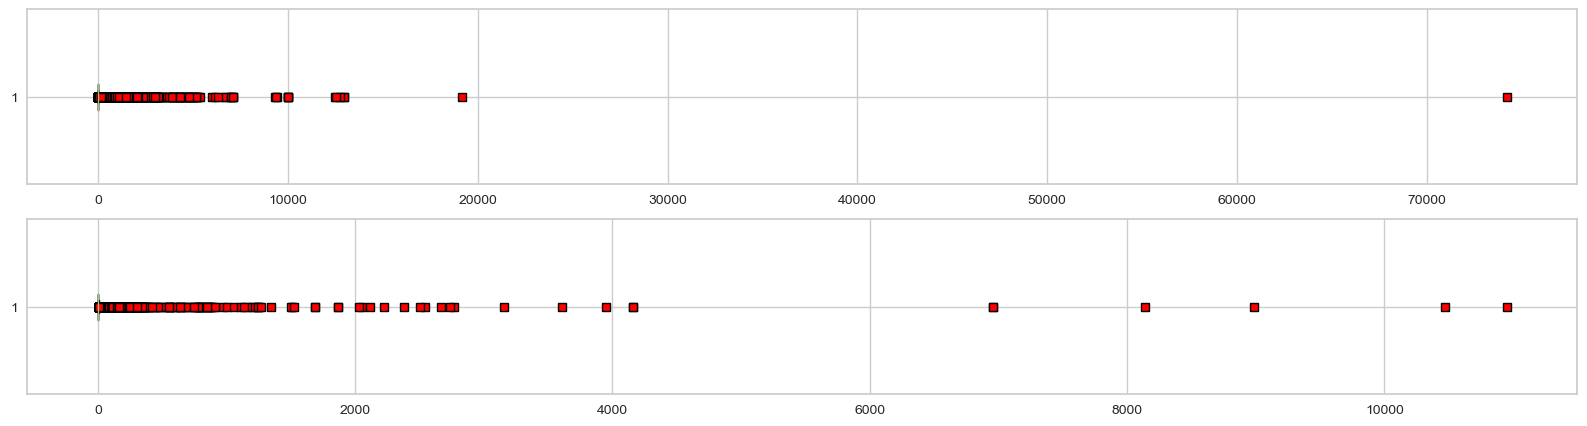

In [10]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","Price"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [11]:
# Applying the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "Price")

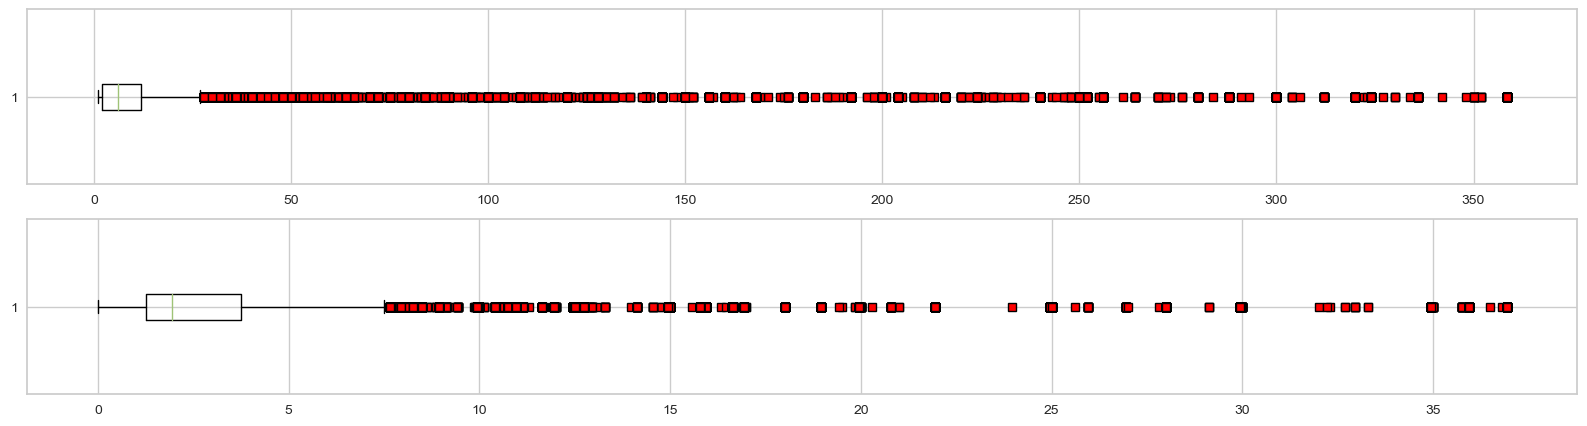

In [12]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

# EDA

In [13]:
#Creating new feature Revenue
data["Revenue"] = data["Quantity"] * data["Price"]

In [14]:
#Creating Features for RFM Model
#Changing data type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

/var/folders/f1/f4pv93hj5mzbv8wfv_s18dr80000gn/T/ipykernel_46195/1809970238.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [15]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())

Max date : 2011-12-04 13:15:00
Min date : 2009-12-01 07:45:00


In [30]:
#RFM Featuring

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                 'Invoice': lambda x: x.nunique(), 
                                                 "Revenue": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

RFM.reset_index().head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,745.70
1,12347.0,39,7,4696.71
2,12348.0,75,5,1991.86
3,12349.0,18,4,3786.50
4,12350.0,310,1,331.34


# new feature- interpurchase time

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">The Fourth varibale of RFM, InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted as fallows : </p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">T = L/(F-1) = (Tn - T1)/(F-1) </p>

<div style="text-align: left;">
  <ul style="list-style-type: disc; font-family: Georgia; color: #000000; font-size: 110%;">
    <li>T --> Interpurchase Time</li>
    <li>L --> Shopping Cycle</li>
    <li>F --> Frequency</li>
    <li>T1 --> First purchase</li>
    <li>Tn --> Last purchase</li>
    
      
  </ul>
</div>

Note: We consider only those customers who made purchase more than once.

In [31]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head().style.set_properties()

,Recency,Frequency,Monetary
Customer ID,,,
12346.000000,325,12,745.700000
12347.000000,39,7,4696.710000
12348.000000,75,5,1991.860000
12349.000000,18,4,3786.500000
12352.000000,36,10,2098.940000


In [18]:
Shopping_Cycle = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

In [32]:
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head().style.set_properties()

,Recency,Frequency,Monetary,Shopping_Cycle
Customer ID,,,,
12346.000000,325,12,745.700000,400
12347.000000,39,7,4696.710000,364
12348.000000,75,5,1991.860000,362
12349.000000,18,4,3786.500000,570
12352.000000,36,10,2098.940000,356


In [33]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head().style.set_properties()

,Recency,Frequency,Monetary,Interpurchase_Time
Customer ID,,,,
12346.000000,325,12,745.700000,33
12347.000000,39,7,4696.710000,52
12348.000000,75,5,1991.860000,72
12349.000000,18,4,3786.500000,142
12352.000000,36,10,2098.940000,35


# K means algorithm

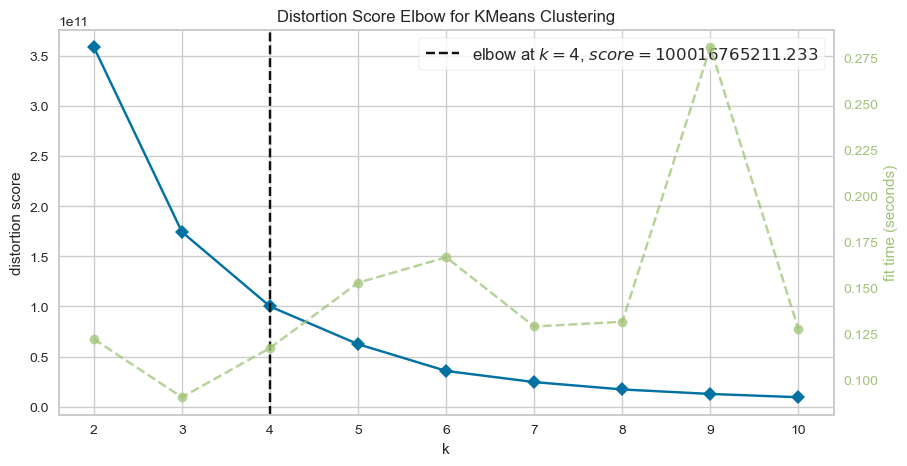

Therefore K = 4


In [34]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()

Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(RFMT)
Elbow_M.show()
print("Therefore K = 4")

In [22]:
#Fitting KMeans Model
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=4)

In [35]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head().style.set_properties()

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
Customer ID,,,,,
12346.000000,325,12,745.700000,33,1
12347.000000,39,7,4696.710000,52,1
12348.000000,75,5,1991.860000,72,1
12349.000000,18,4,3786.500000,142,1
12352.000000,36,10,2098.940000,35,1


# Model evaluation

In [24]:
# how well the clusters are?:
# centriods
kmeans.cluster_centers_

array([[3.81234568e+01, 5.37901235e+01, 3.55362771e+04, 1.86172840e+01],
       [1.50630572e+02, 6.96753876e+00, 2.41315248e+03, 6.99583333e+01],
       [1.35000000e+01, 1.45500000e+02, 5.12989903e+05, 4.50000000e+00],
       [1.26000000e+01, 1.41100000e+02, 1.72089457e+05, 7.10000000e+00]])

<function matplotlib.pyplot.show(close=None, block=None)>

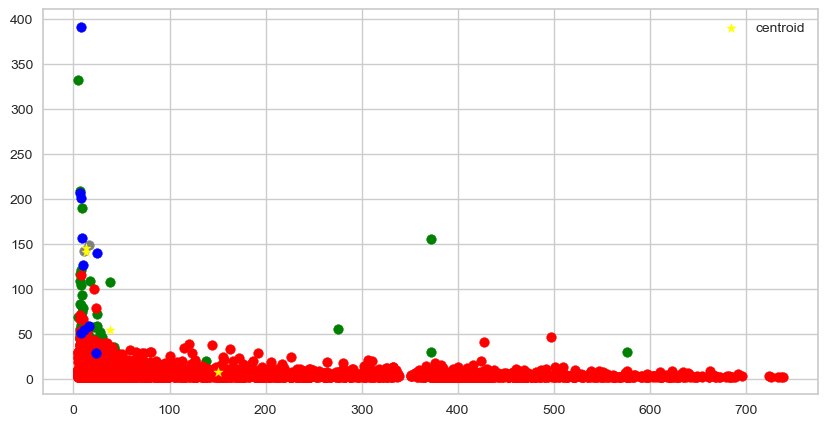

In [37]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()

plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 
    Score closer to 1, higher the cluster distinguished. </p>

In [36]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.9009524644265383
